In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from acquire import get_iris_data
from prepare import prep_iris_data

df = get_iris_data()
df = prep_iris_data(df)
df.head(10)

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
0,setosa,5.1,3.5,1.4,0.2,0
1,setosa,4.9,3.0,1.4,0.2,0
2,setosa,4.7,3.2,1.3,0.2,0
3,setosa,4.6,3.1,1.5,0.2,0
4,setosa,5.0,3.6,1.4,0.2,0
5,setosa,5.4,3.9,1.7,0.4,0
6,setosa,4.6,3.4,1.4,0.3,0
7,setosa,5.0,3.4,1.5,0.2,0
8,setosa,4.4,2.9,1.4,0.2,0
9,setosa,4.9,3.1,1.5,0.1,0


In [3]:
# 1. Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df.species)

In [4]:
train_df.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encode'],
      dtype='object')

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

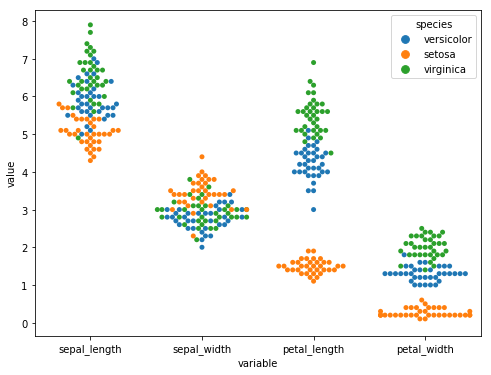

In [13]:
# 2. Create a swarmplot where the x-axis is each of the independent
# variable names (petal_length, petal_width, etc). The y-axis is
# the value of the variable. Use color to represent species as another
# dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe
# in order to accomplish this. What are your takeaways from this visualization?
melted_train_df = pd.melt(train_df, id_vars =['species'], value_vars =['sepal_length',
                                                                'sepal_width',
                                                                'petal_length',
                                                                'petal_width'])
plt.figure(figsize=(8,6))
sns.swarmplot(x="variable", y="value", data=melted_train_df, hue="species")

In [6]:
train_df.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encode'],
      dtype='object')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


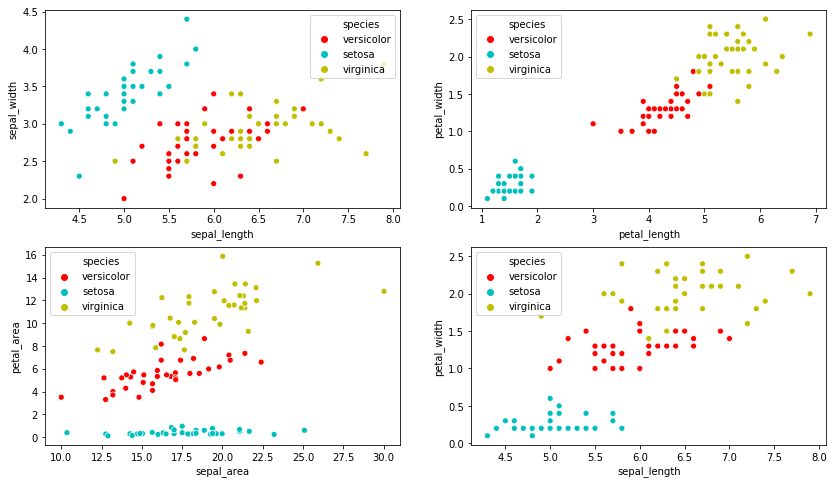

In [16]:
# 3. Create 4 subplots (2 rows x 2 columns) of scatterplots

# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length
# Make your figure size 14 x 8. 

train_df['sepal_area'] = df.sepal_length * df.sepal_width
train_df['petal_area'] = df.petal_length * df.petal_width

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette=['r', 'c', 'y'], data=train_df)

plt.subplot(2,2,2)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', palette=['r', 'c', 'y'],data=train_df)

plt.subplot(2,2,3)
sns.scatterplot(x='sepal_area', y='petal_area', hue='species', palette=['r', 'c', 'y'],data=train_df)

plt.subplot(2,2,4)
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', palette=['r', 'c', 'y'],data=train_df)

What are your takeaways?

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 114 to 109
Data columns (total 8 columns):
species           105 non-null object
sepal_length      105 non-null float64
sepal_width       105 non-null float64
petal_length      105 non-null float64
petal_width       105 non-null float64
species_encode    105 non-null int64
sepal_area        105 non-null float64
petal_area        105 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.4+ KB


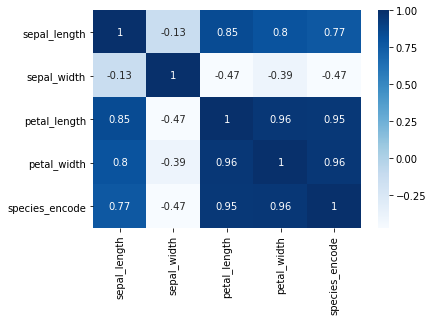

In [29]:
# 4. Create a heatmap of each variable layering correlation coefficient on top.
heated_train_df = train_df.drop(columns='sepal_area')
heated_train_df = heated_train_df.drop(columns='petal_area')
sns.heatmap(heated_train_df.corr(), cmap='Blues', annot=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


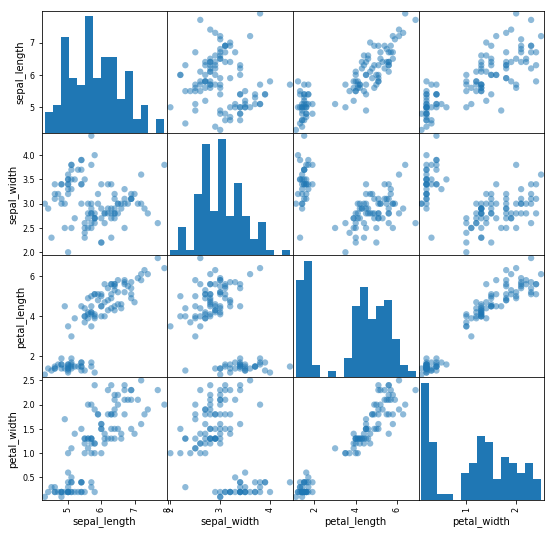

In [28]:
# 5. Create a scatter matrix visualizing the interaction of each variable
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df[['sepal_length','sepal_width','petal_length', 'petal_width']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

In [54]:
# 6. Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.

stats.ttest_ind(
    train_df[train_df.species == 'virginica'].sepal_length.dropna(),
    train_df[train_df.species == 'versicolor'].sepal_length.dropna(),
)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

- H[0] (null hypothesis): the difference in sepal length between virginica and versicolor is insignificant.
- H[a] (alternative hypothesis): the difference in sepal length between virginica and versicolor is substantial.

We 'fail to confirm the null hypothesis' that the difference in sepal_length between virginica and versicolor species is insignificant. In other words, the sepal length between virginiva and versicolor is substantial.